In [1]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/rainfall-data-from-1901-to-2017-for-india/Rainfall_Data_LL.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


,Name,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,...,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,June-September,Oct-Dec,Latitude,Longitude
0,ROW1,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,...,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,12.61124,92.83165
1,ROW2,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,...,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,12.61124,92.83165
2,ROW3,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,...,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,12.61124,92.83165
3,ROW4,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,...,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,12.61124,92.83165
4,ROW5,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,...,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,12.61124,92.83165


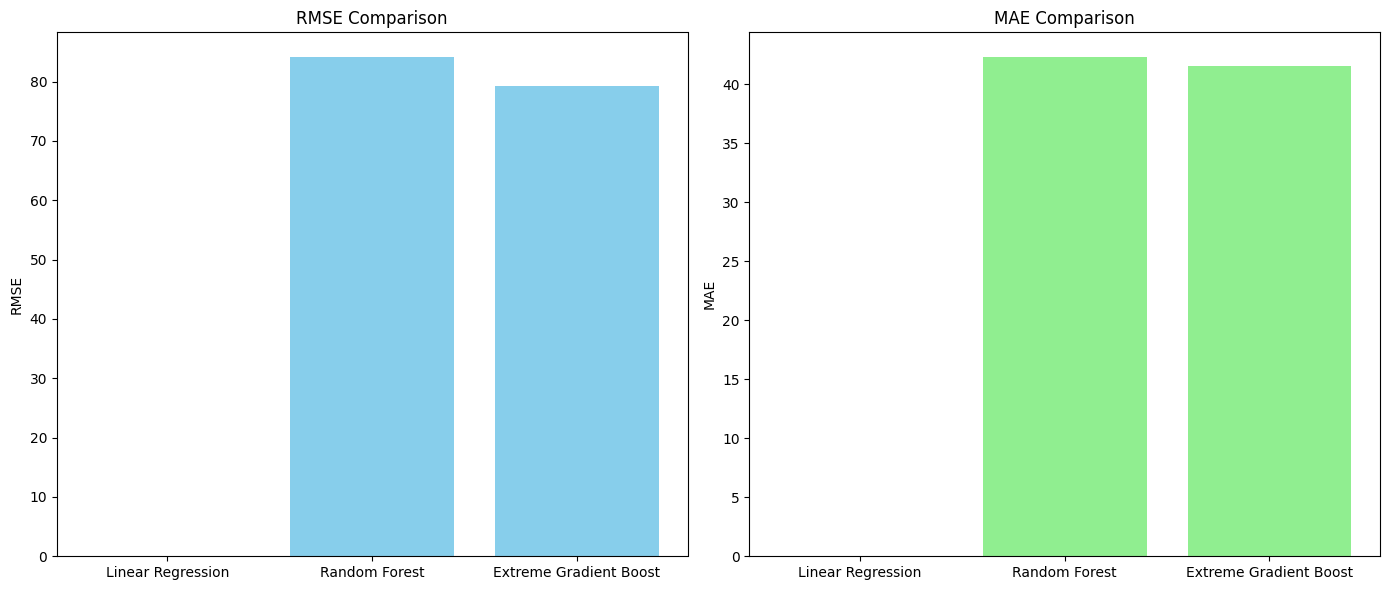

,Model,RMSE,MAE
0,Linear Regression,1.057233e-12,7.648764e-13
1,Random Forest,8.410641e+01,4.226463e+01
2,Extreme Gradient Boost,7.929692e+01,4.154006e+01


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Dropping unnecessary columns (keeping relevant features and the target variable)
data_clean = data.drop(columns=['Name', 'SUBDIVISION', 'Latitude', 'Longitude'])

# Handling any missing data by filling with the median value (common in rainfall data)
data_clean.fillna(data_clean.median(), inplace=True)

# Splitting the data into features (X) and target (y)
X = data_clean.drop(columns=['ANNUAL'])
y = data_clean['ANNUAL']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extreme Gradient Boost': XGBRegressor(random_state=42)
}

# Dictionary to store the performance metrics
performance = {
    'Model': [],
    'RMSE': [],
    'MAE': []
}

# Training, predicting, and evaluating each model
for name, model in models.items():
    # Training the model
    model.fit(X_train_scaled, y_train)
    # Making predictions
    y_pred = model.predict(X_test_scaled)
    # Calculating RMSE and MAE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    # Storing the results
    performance['Model'].append(name)
    performance['RMSE'].append(rmse)
    performance['MAE'].append(mae)

# Convert the performance metrics into a DataFrame for better visualization
performance_df = pd.DataFrame(performance)

# Plotting the RMSE and MAE for each model
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(performance_df['Model'], performance_df['RMSE'], color='skyblue')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.bar(performance_df['Model'], performance_df['MAE'], color='lightgreen')
plt.title('MAE Comparison')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

performance_df


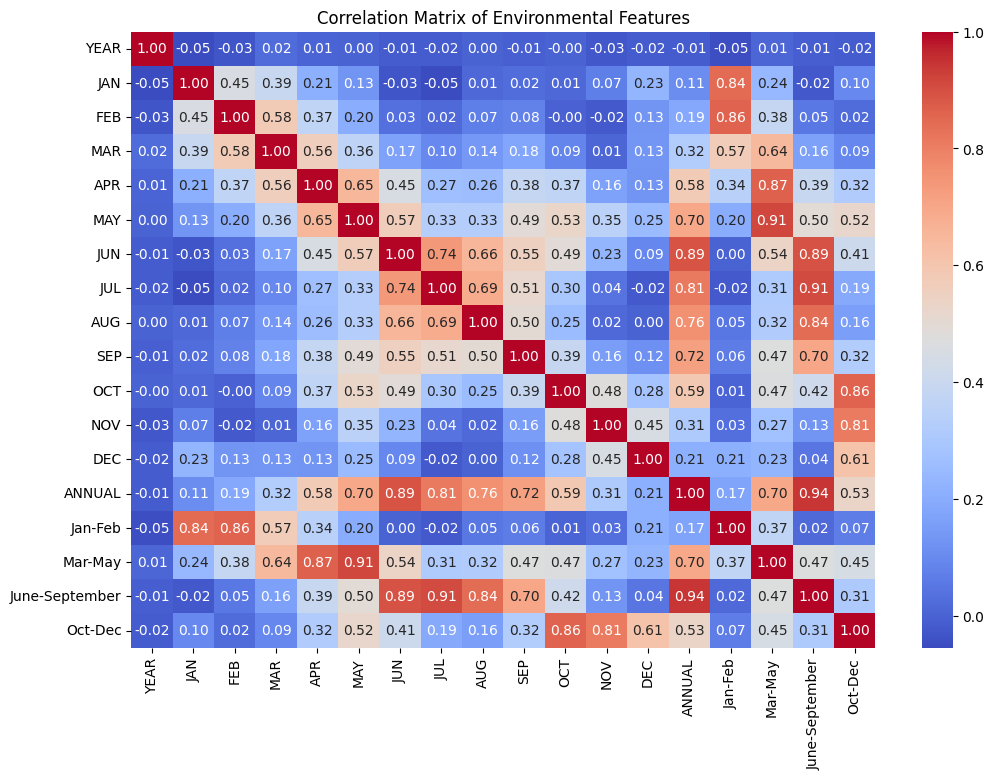

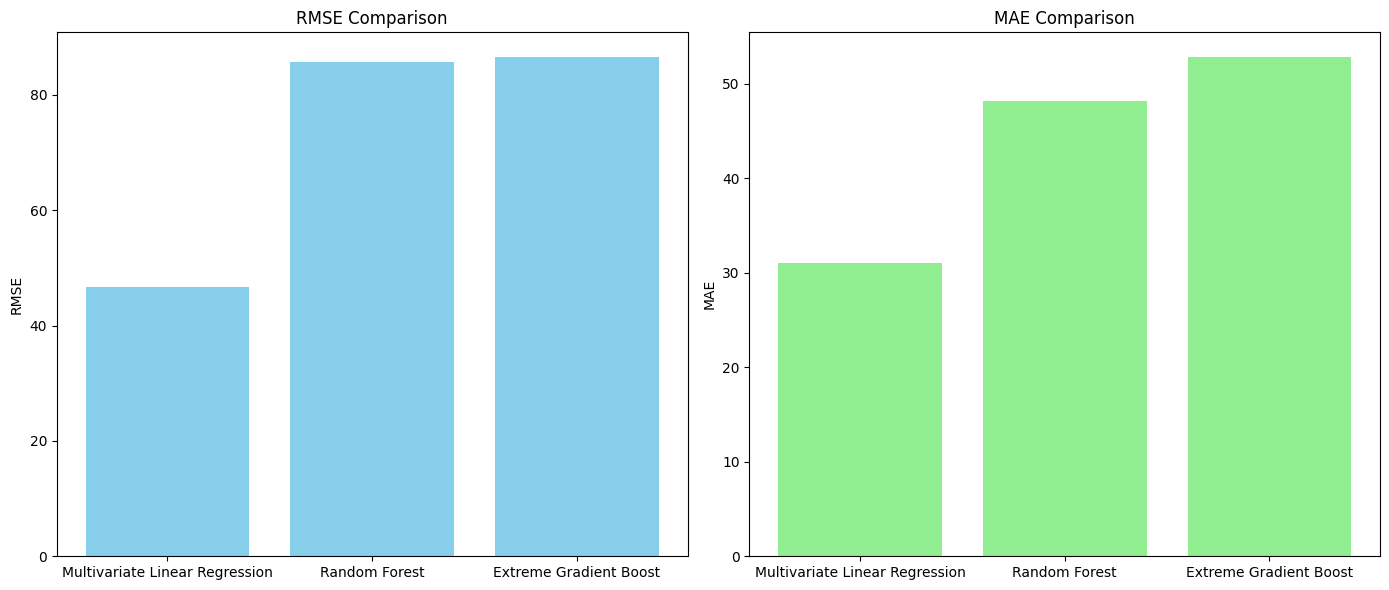

,Model,RMSE,MAE
0,Multivariate Linear Regression,46.679519,31.002600
1,Random Forest,85.649284,48.206138
2,Extreme Gradient Boost,86.509037,52.777715


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reloading the dataset to ensure proper handling
data = pd.read_csv('/kaggle/input/rainfall-data-from-1901-to-2017-for-india/Rainfall_Data_LL.csv')

# Dropping unnecessary columns (keeping relevant features and the target variable)
data_clean = data.drop(columns=['Name', 'SUBDIVISION', 'Latitude', 'Longitude'])

# Handle missing values by filling with the median
data_clean.fillna(data_clean.median(), inplace=True)

# Performing Pearson correlation to select relevant features
correlation_matrix = data_clean.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix of Environmental Features')
plt.show()

# Selecting features with a correlation > 0.2 with the target 'ANNUAL'
relevant_features = correlation_matrix['ANNUAL'].abs().sort_values(ascending=False)
selected_features = relevant_features[relevant_features > 0.2].index.tolist()
selected_features.remove('ANNUAL')

# Preparing the dataset with selected features
X = data_clean[selected_features]
y = data_clean['ANNUAL']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the models
models = {
    'Multivariate Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Extreme Gradient Boost': XGBRegressor(random_state=42, n_estimators=100)
}

# Dictionary to store the performance metrics
performance = {
    'Model': [],
    'RMSE': [],
    'MAE': []
}

# Training, predicting, and evaluating each model
for name, model in models.items():
    # Training the model
    model.fit(X_train_scaled, y_train)
    # Making predictions
    y_pred = model.predict(X_test_scaled)
    # Calculating RMSE and MAE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    # Storing the results
    performance['Model'].append(name)
    performance['RMSE'].append(rmse)
    performance['MAE'].append(mae)

# Convert the performance metrics into a DataFrame for better visualization
performance_df = pd.DataFrame(performance)

# Plotting the RMSE and MAE for each model
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(performance_df['Model'], performance_df['RMSE'], color='skyblue')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.bar(performance_df['Model'], performance_df['MAE'], color='lightgreen')
plt.title('MAE Comparison')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

performance_df


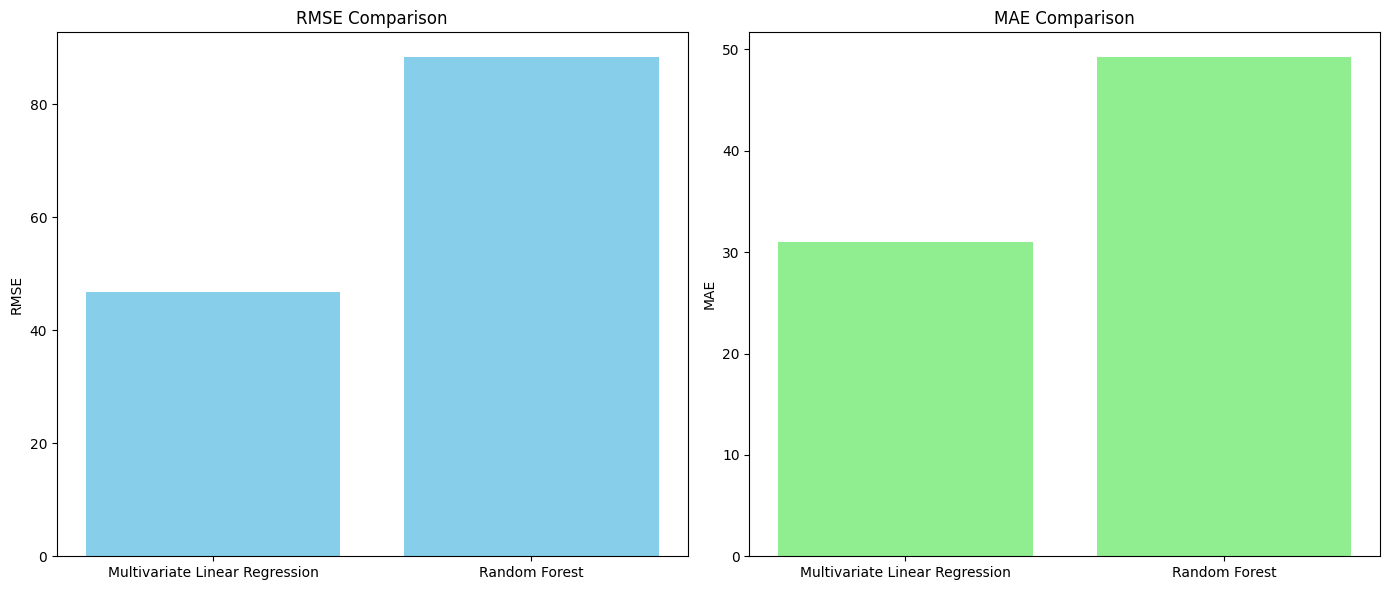

,Model,RMSE,MAE
0,Multivariate Linear Regression,46.679519,31.002600
1,Random Forest,88.270965,49.219664


In [4]:
# Adjusting the approach to only focus on Linear Regression and Random Forest for quicker results
models = {
    'Multivariate Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=50)  # Further reducing number of estimators
}

# Resetting performance storage
performance = {
    'Model': [],
    'RMSE': [],
    'MAE': []
}

# Training, predicting, and evaluating each model
for name, model in models.items():
    # Training the model
    model.fit(X_train_scaled, y_train)
    # Making predictions
    y_pred = model.predict(X_test_scaled)
    # Calculating RMSE and MAE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    # Storing the results
    performance['Model'].append(name)
    performance['RMSE'].append(rmse)
    performance['MAE'].append(mae)

# Convert the performance metrics into a DataFrame for better visualization
performance_df = pd.DataFrame(performance)

# Plotting the RMSE and MAE for each model
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(performance_df['Model'], performance_df['RMSE'], color='skyblue')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.bar(performance_df['Model'], performance_df['MAE'], color='lightgreen')
plt.title('MAE Comparison')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

performance_df


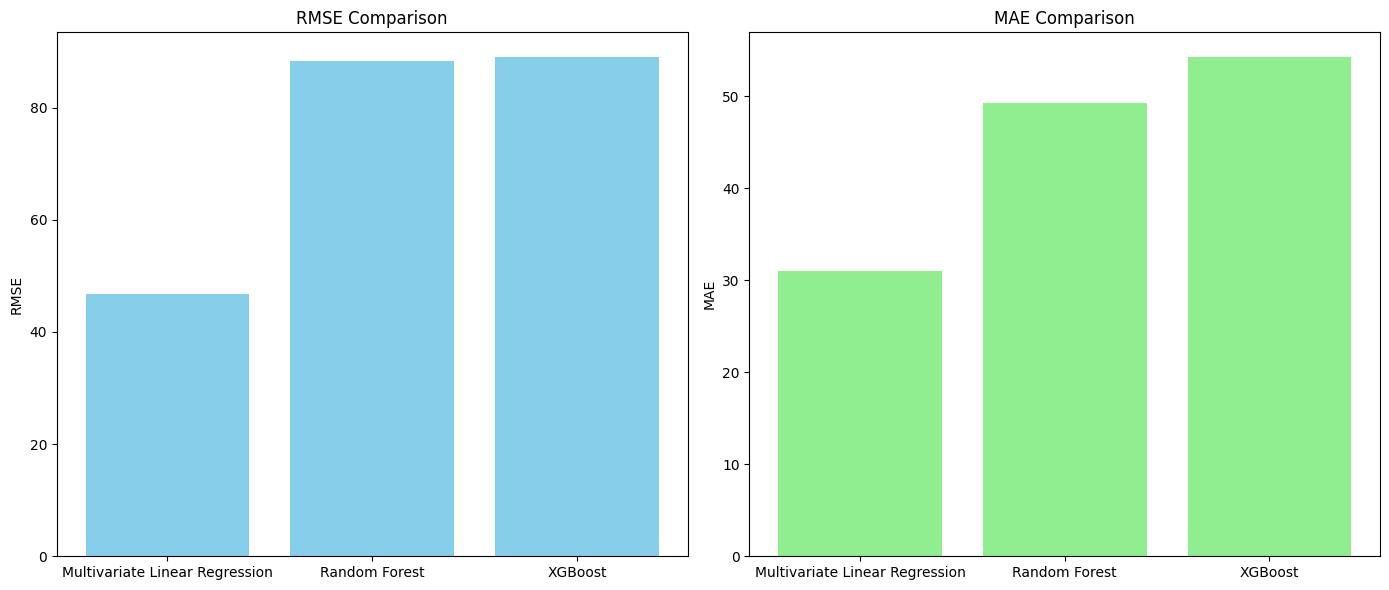

,Model,RMSE,MAE
0,Multivariate Linear Regression,46.679519,31.002600
1,Random Forest,88.270965,49.219664
2,XGBoost,88.957814,54.221824


In [5]:
# Adjusting the XGBRegressor with fewer estimators to speed up the training process
xgboost_model = XGBRegressor(random_state=42, n_estimators=20)  # Further reducing number of estimators

# Training the XGBoost model
xgboost_model.fit(X_train_scaled, y_train)

# Making predictions with XGBoost
y_pred_xgb = xgboost_model.predict(X_test_scaled)

# Calculating RMSE and MAE for XGBoost
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

# Adding the XGBoost performance to the DataFrame
xgb_performance = pd.DataFrame({
    'Model': ['XGBoost'],
    'RMSE': [rmse_xgb],
    'MAE': [mae_xgb]
})

# Appending to the existing performance DataFrame
performance_df = pd.concat([performance_df, xgb_performance], ignore_index=True)

# Plotting the RMSE and MAE for each model including XGBoost
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(performance_df['Model'], performance_df['RMSE'], color='skyblue')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.bar(performance_df['Model'], performance_df['MAE'], color='lightgreen')
plt.title('MAE Comparison')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

performance_df


Fitting 3 folds for each of 108 candidates, totalling 324 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.2s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   5.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   2.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=50; total time=   1.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_

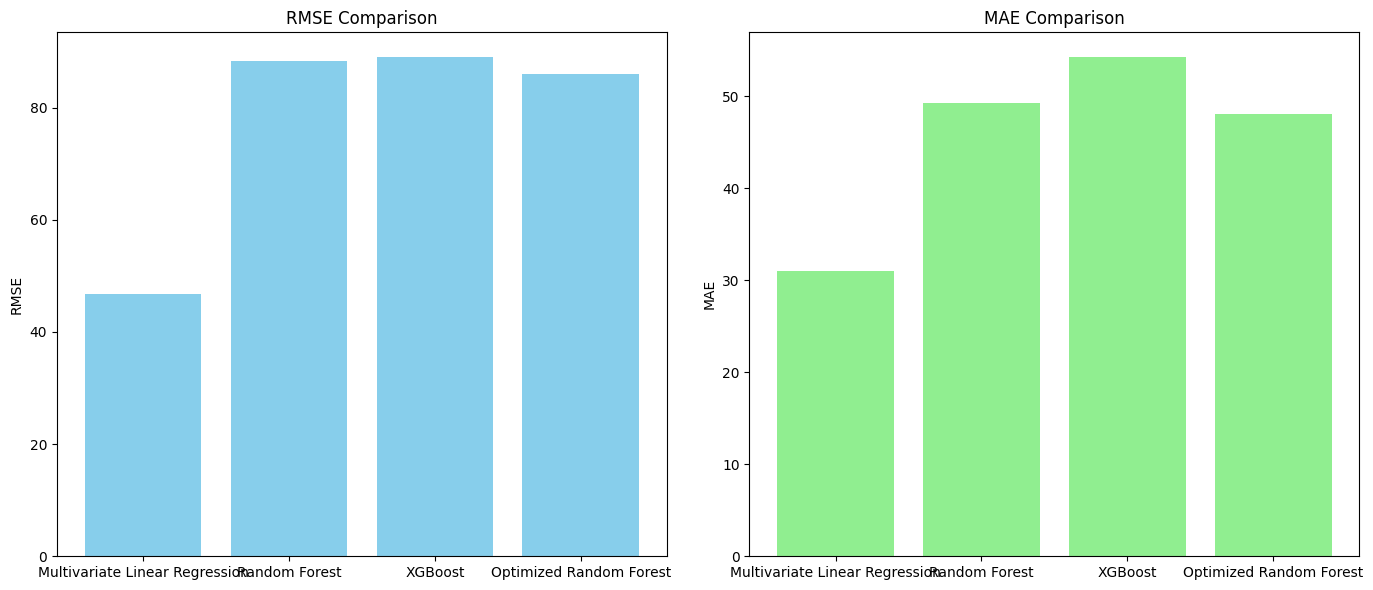

({'max_depth': 20,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
                             Model       RMSE        MAE
 0  Multivariate Linear Regression  46.679519  31.002600
 1                   Random Forest  88.270965  49.219664
 2                         XGBoost  88.957814  54.221824
 3         Optimized Random Forest  86.039888  48.032467)

In [6]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_

# Train the optimized Random Forest model with the best parameters
optimized_rf_model = RandomForestRegressor(random_state=42, **best_params)
optimized_rf_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the optimized model
y_pred_optimized_rf = optimized_rf_model.predict(X_test_scaled)
rmse_optimized_rf = np.sqrt(mean_squared_error(y_test, y_pred_optimized_rf))
mae_optimized_rf = mean_absolute_error(y_test, y_pred_optimized_rf)

# Add the optimized Random Forest performance to the DataFrame
optimized_rf_performance = pd.DataFrame({
    'Model': ['Optimized Random Forest'],
    'RMSE': [rmse_optimized_rf],
    'MAE': [mae_optimized_rf]
})

# Appending to the existing performance DataFrame
performance_df = pd.concat([performance_df, optimized_rf_performance], ignore_index=True)

# Plotting the RMSE and MAE for each model including the optimized Random Forest
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(performance_df['Model'], performance_df['RMSE'], color='skyblue')
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

plt.subplot(1, 2, 2)
plt.bar(performance_df['Model'], performance_df['MAE'], color='lightgreen')
plt.title('MAE Comparison')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()

best_params, performance_df


In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# Load the dataset
data = pd.read_csv('/kaggle/input/rainfall-data-from-1901-to-2017-for-india/Rainfall_Data_LL.csv')

# Preprocessing: Selecting features and target variable
target = 'ANNUAL'
features = data.columns[3:15]  # Assuming monthly rainfall is used as features

# Dropping rows with missing values in selected columns
data_cleaned = data.dropna(subset=features.tolist() + [target])

# Splitting the dataset into features (X) and target (y)
X = data_cleaned[features]
y = data_cleaned[target]

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Multivariate Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "Optimized Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
}

# Train models and evaluate performance
performance = []
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    performance.append((model_name, rmse, mae))

# Convert performance to DataFrame for comparison
performance_df = pd.DataFrame(performance, columns=["Model", "RMSE", "MAE"])
performance_df.sort_values(by="RMSE", inplace=True)

# Display the performance of all models
print(performance_df)


                            Model          RMSE           MAE
0  Multivariate Linear Regression  1.206146e-12  9.755633e-13
2                         XGBoost  1.375993e+02  8.176431e+01
1                   Random Forest  1.658036e+02  9.296062e+01
3         Optimized Random Forest  1.715536e+02  1.031189e+02
